# Import library

In [19]:
import os
import sys

# add current directory to system path
sys.path.insert(0, os.getcwd())
from pathlib import Path

from IPython.display import display
import numpy as np
import pandas as pd


from pyDLCbehavior import glob_files, NovelObjectRecognitionAnalysis


# Set the path

In [20]:
HOMEDIR = r"C:\Users\325576\Project\deeplabcut-analysis\sample\NOR"
files_dict = glob_files(HOMEDIR)

csv_list = files_dict.get(".csv")
pkl_list = files_dict.get(".pickle")
video_list = files_dict.get(".avi")


# Run

Saving...
Compressed pickle was saved at C:\Users\325576\Project\deeplabcut-analysis\sample\NOR\00104_xvid_subset4DLC_resnet50_Colab_200204Feb4shuffle1_781000_analysis.pkl.gz.


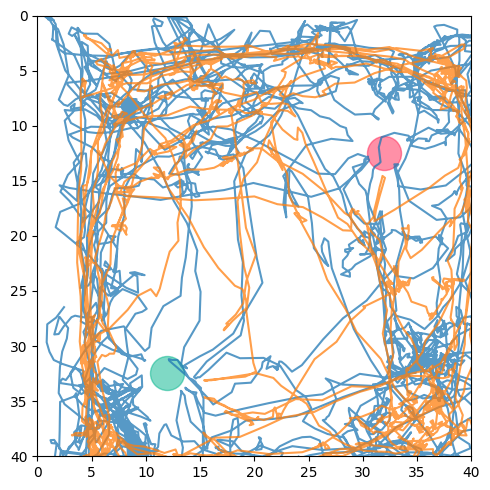

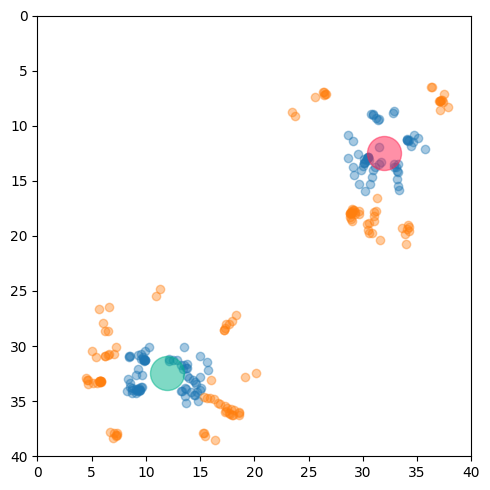

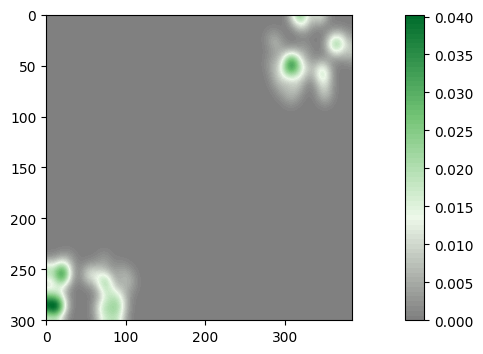

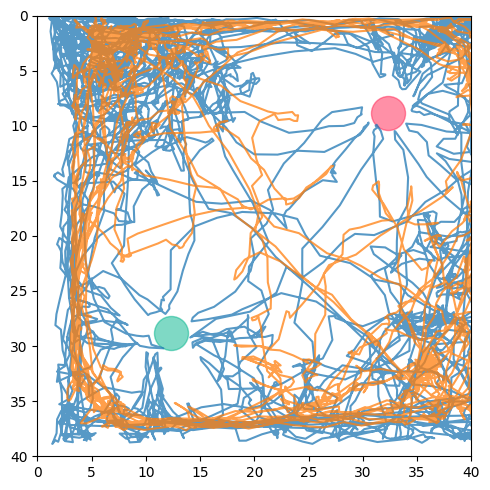

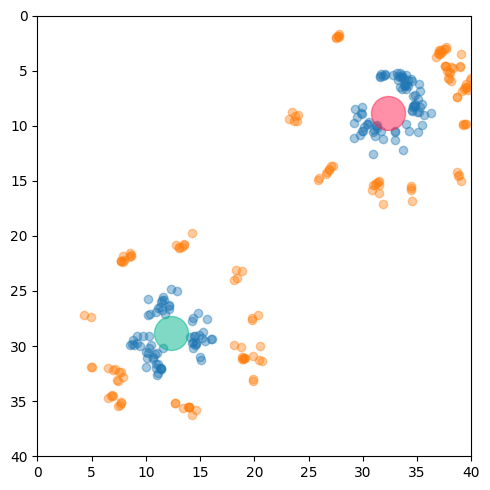

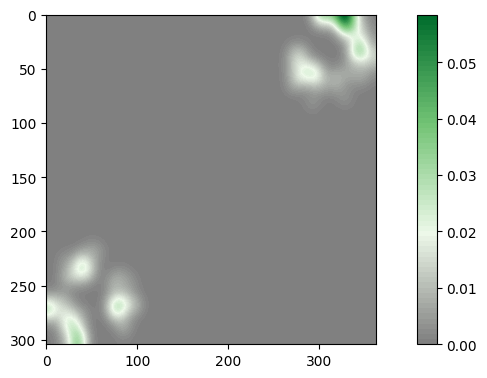

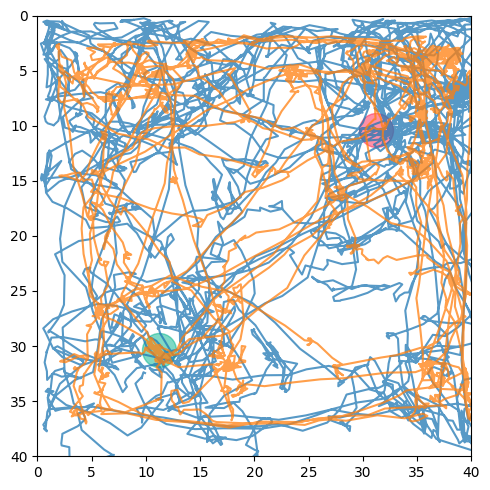

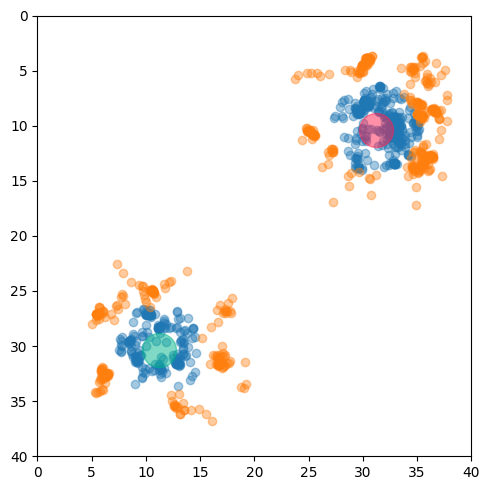

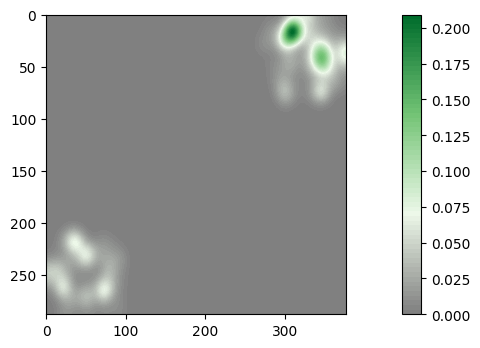

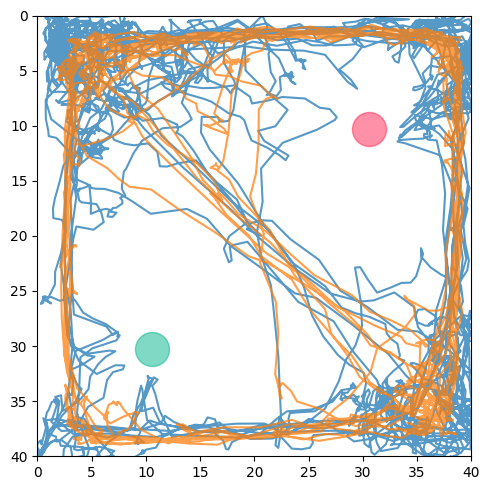

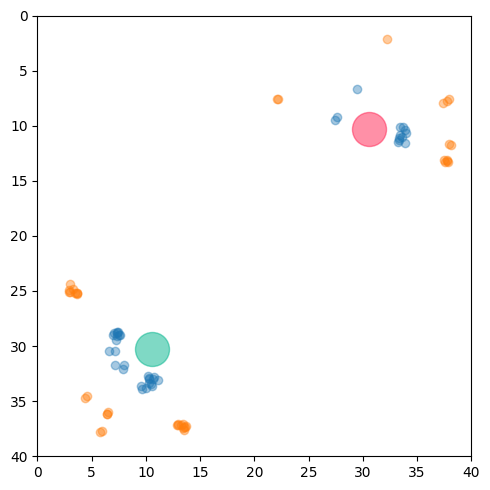

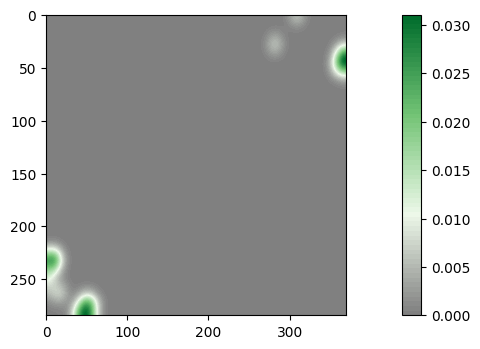

In [21]:
# example workflow
def workflow(nor: NovelObjectRecognitionAnalysis) -> None:
    # select object
    nor.select_objects(num_of_objects=2)

    # [OPTION] add object manually
    # nor.add_object(Roi(x = 200, y = 50))
    # nor.add_object(Roi(x = 50, y = 300))
    nor.analyze()

    nor.plot_trajectory()
    nor.plot_filter_scatter()
    nor.plot_heatmap()

    nor.to_pickle()


nor_list = []
for csv, pkl, video in zip(csv_list, pkl_list, video_list):
    nor = NovelObjectRecognitionAnalysis(csv, pkl, video)
    workflow(nor)
    nor_list.append(nor)


# Summarize to dataframe

In [22]:

discriminate_df = pd.concat([n.summary_df for n in nor_list], axis = 0)
discriminate_df.filename = discriminate_df.filename.apply(lambda x: x.split("DLC")[0])
display(discriminate_df)


,filename,FrameNumber_exploration_Zone1,FrameNumber_exploration_Zone2,video_fps,Time_exploration_Zone1,Time_exploration_Zone2,Zone1_x,Zone1_y,Zone2_x,Zone2_y,Zone1_coord,Zone2_coord,video_shape_w,video_shape_h,Discrimination_index_Zone1_to_Zone2,Discrimination_index_Zone2_to_Zone1,total_distance,mean_speed
0,00104_xvid_subset1,60,74,8.0,7.500,9.250,31.942446,12.457143,31.942446,12.457143,"(222, 109)","(83, 284)",300,300,-0.104478,0.104478,2162.052832,3.604407
0,00104_xvid_subset2,77,67,8.0,9.625,8.375,32.330827,8.852459,32.330827,8.852459,"(215, 81)","(82, 264)",304,304,0.069444,-0.069444,2965.506400,4.949908
0,00104_xvid_subset3,413,236,8.0,51.625,29.500,31.194030,10.366492,31.194030,10.366492,"(209, 99)","(75, 290)",288,288,0.272727,-0.272727,2175.454313,3.625782
0,00104_xvid_subset4,13,26,8.0,1.625,3.250,30.579710,10.273224,30.579710,10.273224,"(211, 94)","(73, 277)",284,284,-0.333333,0.333333,2374.060522,3.962441
